# 27 September 2021

## **Latihan Feature Engineering**

### **Boston house price prediction**

Info mengenai dataset: <https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names>

- Gunakan seluruh features yang ada sebagai input model. Target: 'PRICE'
- Imputasi missing value jika ada.
- Bagaimana korelasi tiap variable terhadap target?
<br><br>
- Lakukan splitting dengan proporsi 70:30 dan random_state = 4.
- Gunakan model Linear Regression sebagai model benchmark. Lakukan pemodelan dengan menggunakan sklearn.
- Plot harga asli dan prediksi. Interpretasikan hasilnya.
- Bagaimana distribusi residuals-nya? Apakah asumsi normalitas terpenuhi?
<br><br>
- Lakukan pemodelan dengan menggunakan Polynomial order 2.
- Bandingkan hasilnya dengan model benchmark jika ditinjau dari nilai RMSE-nya.

In [ ]:
linreg = LinearRegression()

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# Initializing the dataframe
df = pd.DataFrame(boston.data)

In [4]:
# See head of the dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Adding the feature names to the dataframe
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Tiap baris pada dataset mendeskripsikan suatu suburb atau town di Boston**

- CRIM per capita crime rate by town <br>
- ZN proportion of residential land zoned for lots over 25,000 sq.ft. <br>
- INDUS proportion of non-retail business acres per town <br>
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) <br>
- NOX nitric oxides concentration (parts per 10 million) <br>
- RM average number of rooms per dwelling <br>
- AGE proportion of owner-occupied units built prior to 1940 <br>
- DIS weighted distances to five Boston employment centres <br>
- RAD index of accessibility to radial highways <br>
- TAX full-value property-tax rate per 10,000usd <br>
- PTRATIO pupil-teacher ratio by town <br>
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
- LSTAT % lower status of the population

In [6]:
# Adding target variable to dataframe
# Median value of owner-occupied homes in $1000s
df['PRICE'] = boston.target 

In [7]:
# Check the shape of dataframe
df.shape

(506, 14)

In [8]:
# Check columns name
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [9]:
# Check datatypes
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [10]:
# Identifying the unique number of values in the dataset
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [11]:
# Check for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [12]:
# See rows with missing values
df[df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [13]:
# Check data statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(14, 14)

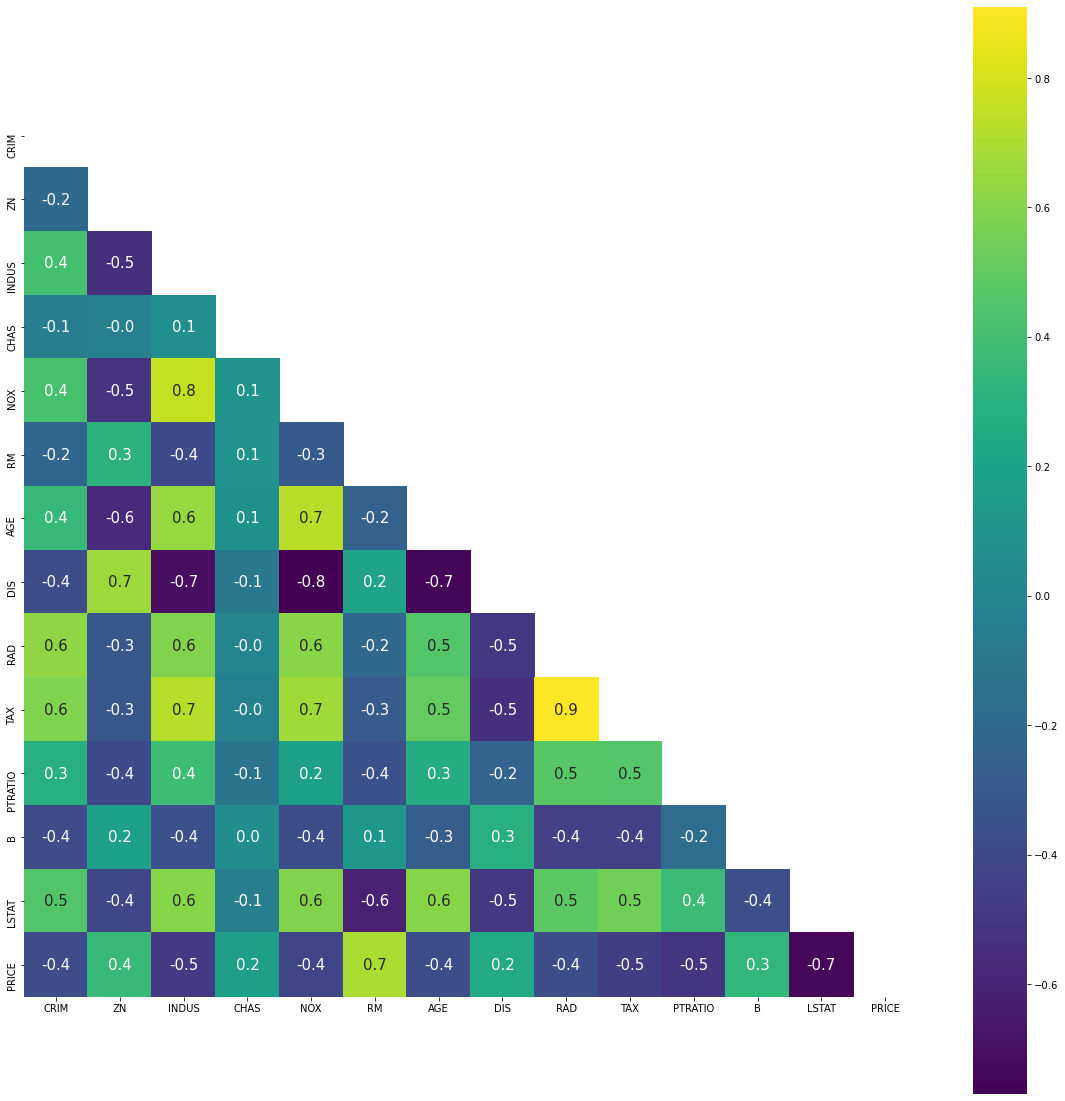

In [15]:
# Plotting the heatmap of correlation between features
mask = np.zeros_like(df.corr()) 
mask[np.triu_indices_from(mask)]=True 

plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='viridis', mask=mask);

In [16]:
# Spliting target variable and independent variables
X = df.drop(['PRICE'], axis = 1)
y = df['PRICE']

In [17]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

# Linear regression

#### Training the model

In [18]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
# Value of y intercept
lm.intercept_

36.357041376595205

In [20]:
# Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns, lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.12257
1,ZN,0.055678
2,INDUS,-0.008834
3,CHAS,4.693448
4,NOX,-14.435783
5,RM,3.28008
6,AGE,-0.003448
7,DIS,-1.552144
8,RAD,0.32625
9,TAX,-0.014067


#### Model Evaluation

In [21]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [22]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.08986109497113
MSE: 19.07368870346903
RMSE: 4.367343437774162


**𝑅^2:** Ukuran hubungan linear antara X dan y. R-squared diinterpretasikan sebagai proporsi variance variablel dependen yang dapat digambarkan oleh variabel independen.

**Adjusted 𝑅^2:** Adjusted R-squared membandingkan explanatory power dari model regresi yang mengandung beberapa prediktor/variabel independen.

**MAE:** Mean of the absolute value of the errors. Mengukur rata-rata perbedaan/selisih antara y aktual dan y prediksi berdasarkan nilai absolut dari selisih tersebut.

**MSE:** Mean square error. Sama seperti MAE, tetapi selisih antara y aktual dan y prediksi dikuadratkan terlebih dahulu sebelum dijumlahkan dan dirata-ratakan.

**RMSE:** Hasil akar dari MSE. Biasa digunakan untuk interpretasi hasil.

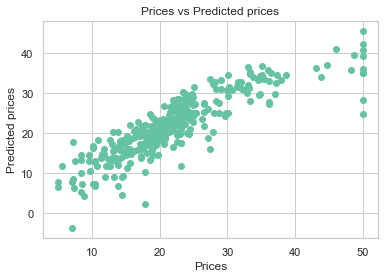

In [23]:
# Visualizing the differences between actual prices and predicted values
sns.set(style='whitegrid', palette='Set2')
plt.scatter(y_train, y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.title('Prices vs Predicted prices');

### **Interpretasi**

Dari plot di atas, terlihat bahwa nilai prediksi cenderung lebih kecil dari nilai aktualnya.

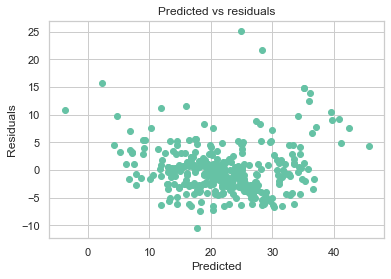

In [24]:
# Checking residuals
plt.scatter(y_pred, y_train-y_pred)
plt.title('Predicted vs residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals');

### **Interpretasi** 

Tidak ada pola yang jelas pada plot di atas dan values secara umum terdistribusi di sekitar 0. Dari hasil ini, asumsi normalitas dapat dikatakan terpenuhi.

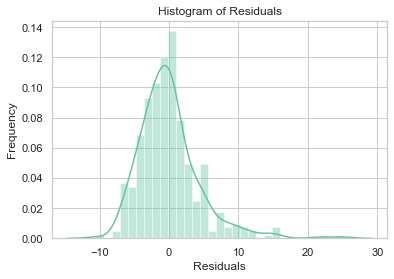

In [25]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency');

Jika ditinjau dengan menggunakan histogram, dapat dilihat bahwa residuals terdistribusi mengikuti distribusi normal. Jadi, asumsi normalitas pada residuals terpenuhi. Namun, agar tidak subyektif, hal ini perlu divalidasi lagi dengan menggunakan QQ-plot atau uji normalitas.

#### For test data

In [26]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

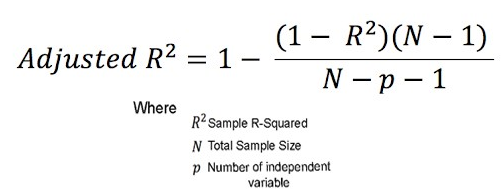

In [27]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:', 1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7121818377409195
Adjusted R^2: 0.6850685326005713
MAE: 3.8590055923707407
MSE: 30.053993307124134
RMSE: 5.482152251362975


### **Interpretasi**

Dari hasil pengujian menggunakan test data, nilai evaluasi model tidak terpaut jauh dengan hasil pada train data. Dapat dikatakan bahwa model tidak mengalami overfitting.

## **Polynomial Regression**

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
# Fit and transform polynomial
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False) 
poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [30]:
pd.DataFrame(X_train_poly,columns = poly.get_feature_names())

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x9^2,x9 x10,x9 x11,x9 x12,x10^2,x10 x11,x10 x12,x11^2,x11 x12,x12^2
0,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3.0,247.0,...,61009.0,4569.5,98034.30,2376.14,342.25,7342.650,177.970,157529.6100,3818.1780,92.5444
1,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,...,111556.0,7348.0,127855.20,2688.70,484.00,8421.600,177.100,146535.8400,3081.5400,64.8025
2,0.40771,0.0,6.20,1.0,0.507,6.164,91.3,3.0480,8.0,307.0,...,94249.0,5341.8,121338.68,6588.22,302.76,6877.176,373.404,156214.6576,8481.8504,460.5316
3,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,...,94249.0,6447.0,76231.17,6244.38,441.00,5214.510,427.140,61657.8561,5050.6254,413.7156
4,0.57834,20.0,3.97,0.0,0.575,8.297,67.0,2.4216,5.0,264.0,...,69696.0,3432.0,101518.56,1964.16,169.00,4999.020,96.720,147871.0116,2860.9776,55.3536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,...,443556.0,13453.2,264335.40,20519.46,408.04,8017.380,622.362,157529.6100,12228.4890,949.2561
350,0.04666,80.0,1.52,0.0,0.404,7.107,36.6,7.3090,2.0,329.0,...,108241.0,4145.4,116567.99,2832.69,158.76,4464.306,108.486,125535.5761,3050.6091,74.1321
351,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24.0,666.0,...,443556.0,13453.2,264335.40,15238.08,408.04,8017.380,462.176,157529.6100,9081.0720,523.4944
352,0.08447,0.0,4.05,0.0,0.510,5.859,68.7,2.7019,5.0,296.0,...,87616.0,4913.6,116396.08,2853.44,275.56,6527.618,160.024,154629.8329,3790.7372,92.9296


**Karena basis dari polynomial adalah linear regression, maka kita fitting X_train_poly ke model linear regression**

In [31]:
# Fitting
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [32]:
# Predict
y_pred_poly = lr.predict(X_test_poly)

In [33]:
# Polynomial model evaluation
acc_poly = metrics.r2_score(y_test, y_pred_poly)
print('R^2:', acc_poly)
print('Adjusted R^2:', 1 - (1-metrics.r2_score(y_test, y_pred_poly))*(len(y_test)-1)/(len(y_test)-X_test_poly.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_poly))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_poly))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

R^2: 0.8581336374519506
Adjusted R^2: 0.54421657989882
MAE: 2.6331990617511174
MSE: 14.813695831631309
RMSE: 3.8488564316730898


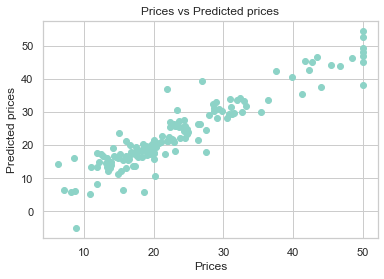

In [34]:
# Visualizing the differences between actual prices and predicted values
sns.set(style='whitegrid', palette='Set3')
plt.scatter(y_test, y_pred_poly)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.title('Prices vs Predicted prices');

### **Interpretasi**

Dari plot hasil model polynomial di atas, terlihat bahwa secara umum nilai prediksi lebih mendekati nilai aktualnya jika dibandingkan dengan hasil model linear regression order 1. 

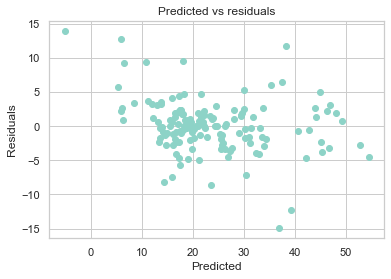

In [35]:
# Checking residuals
plt.scatter(y_pred_poly, y_test-y_pred_poly)
plt.title('Predicted vs residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals');

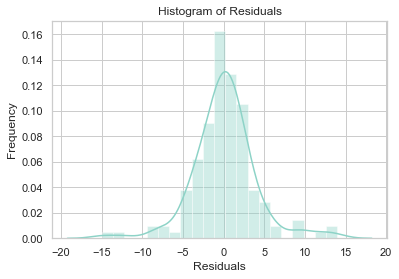

In [36]:
# Checking Normality of errors
sns.distplot(y_test-y_pred_poly)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency');

In [37]:
rmse_lr = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
rmse_poly = np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly))

mae_lr = metrics.mean_absolute_error(y_test, y_test_pred)
mae_poly = metrics.mean_absolute_error(y_test, y_pred_poly)

### **Interpretasi**

Jika hanya dilihat dari histogram, residuals terlihat terdistribusi mengikuti distribusi normal, sehingga asumsi normalitas terpenuhi.

# Evaluation and comparision of all the models

In [38]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'R-squared Score': [acc_linreg*100, acc_poly*100],
    'RMSE': [rmse_lr, rmse_poly],
    'MAE': [mae_lr, mae_poly]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score,RMSE,MAE
1,Polynomial Regression,85.813364,3.848856,2.633199
0,Linear Regression,71.218184,4.367343,3.859006


## **Interpretasi**

Jika dilihat dari nilai RMSE dan MAE, terlihat bahwa polynomial regression menghasilkan error yang lebih kecil. Ini berarti, penambahan feature polynomial terhadap model linear regresi dapat meningkatkan performa model. Feature polynomial order 2 lebih dapat menangkap pola persebaran data lebih baik daripada order 1 saja, sehingga output model lebih optimal.

***Degree pada polynomial menggambarkan seberapa besar tingkat fleksibilitas model. Semakin tinggi degree-nya, berarti akan semakin banyak pula data poin yang dikenai oleh garis regresi.***

Secara kuantitatif, overfitting dan underfitting dapat dievaluasi dengan menggunakan cross-validation.
<br>
Kita dapat menghitung nilai RMSE pada validation atau test set. Semakin tinggi nilai RMSE-nya, berarti semakin kecil pula kemungkinan model dapat menggeneralisasi data training dengan baik.